In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.shape

(70000, 13)

In [33]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [20]:
def ifoverweight(a):
    if a>25:
        return 1
    else :
        return 0

#### creating a column that shows if the persone is overweigh or not

In [25]:
df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(ifoverweight)

In [27]:
df.sample(10)['overweight']

3871     1
35142    1
25061    0
37090    1
48966    1
52709    1
27834    0
7309     0
53972    0
1673     1
Name: overweight, dtype: int64

#### Normalising the colestrol and glucse value to 1 or 0 

In [30]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1)

#### creating a new dataframe for catplot 

In [35]:
df_cat  = pd.melt(df, id_vars=['cardio'],
                  value_vars = ['cholesterol','gluc',
                                'smoke','alco','active','overweight'])

In [37]:
df_cat.shape

(420000, 3)

In [38]:
df_cat.sample(10)

,cardio,variable,value
397822,0,overweight,1
383721,1,overweight,0
344567,1,active,1
263620,0,alco,0
130844,1,gluc,0
37355,0,cholesterol,1
173534,0,smoke,0
45783,0,cholesterol,0
154304,0,smoke,0
103969,0,gluc,1


In [39]:
df_cat['totel'] = 1

In [40]:
df_cat

,cardio,variable,value,totel
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


In [41]:
df_cat= df_cat.groupby(['cardio','variable','value'],as_index=False).count()

In [42]:
df_cat

,cardio,variable,value,totel
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


C:\Users\deves\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


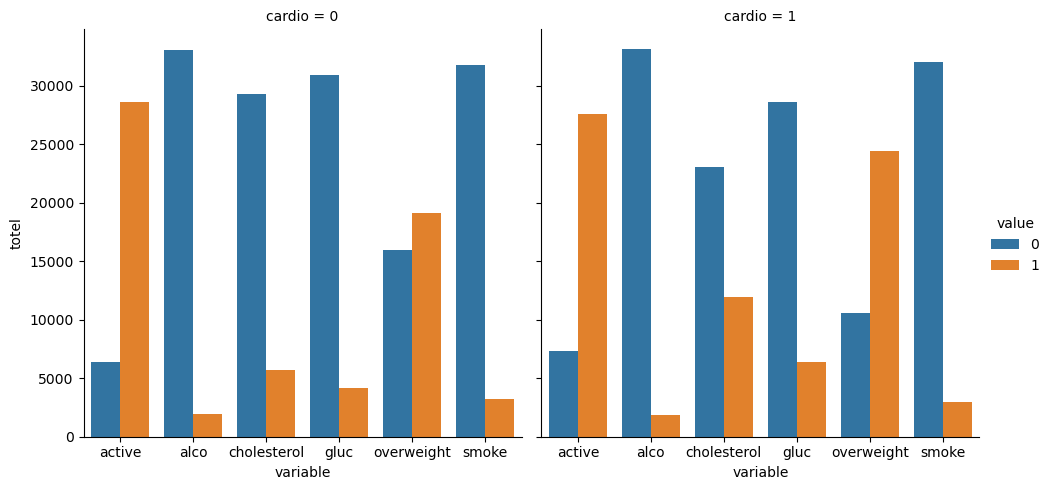

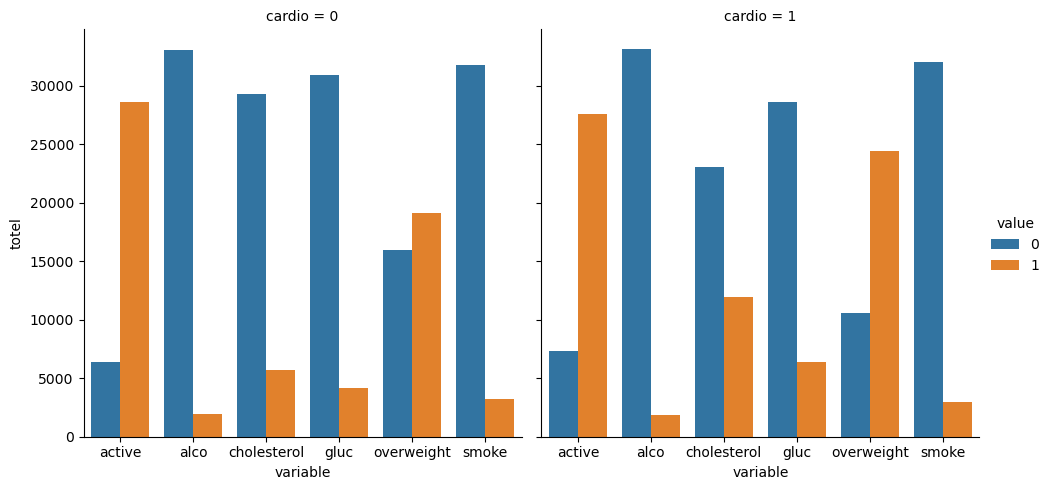

In [45]:
sns.catplot(x='variable',y='totel', data= df_cat, hue='value',kind='bar',col='cardio').fig

In [46]:
fig.savefig('snsplot.png')

### clean the data remove outliers


In [61]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df.height >= df.height.quantile(0.025) ) & 
      (df.height<=df.height.quantile(0.975)) & (df.weight >= df.weight.quantile(0.025)) &
      (df.weight <= df.weight.quantile(0.975))
      ]

In [63]:
corr = df_heat.corr(method='pearson')

In [64]:
mask = np.triu(corr)

In [ ]:
fig , ax = plt.subplot(figsize=(12,12))

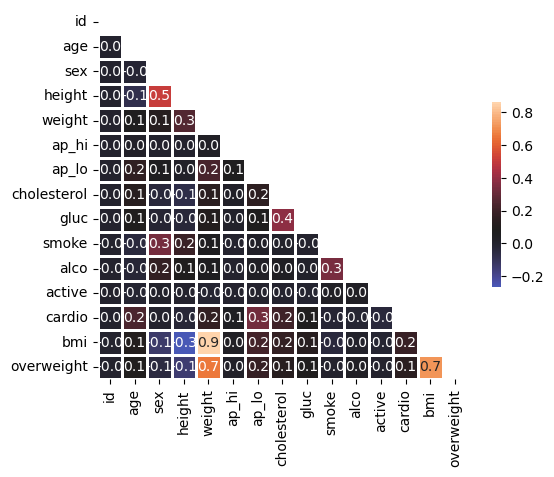

In [82]:
sns.heatmap(corr, linewidth=1, annot=True,
           square=True, mask = mask, fmt = '.1f',
           center = 0.08, cbar_kws= {'shrink':0.5})
fig.savefig('h1.png')

In [83]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [91]:
df_copy

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [94]:
df1['age'] = df1.age/365

In [99]:
df1['age'] = df1['age'].astype(int)

In [100]:
df1.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [102]:
df1.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

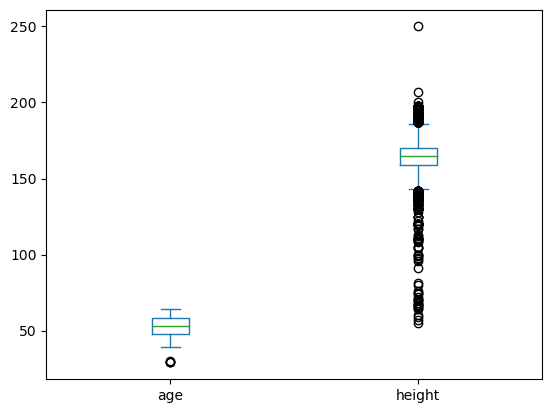

In [111]:
df1.loc[:,['age','height']].plot(kind='box')

<Axes: >

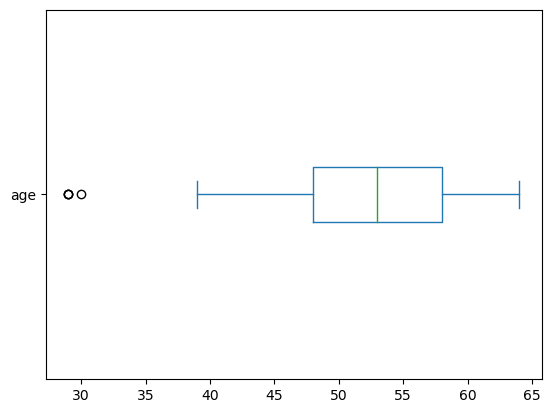

In [114]:
df1.age.plot(kind='box',vert=False)